## 授業前課題1 アヤメの分析

### 1.このテキストについて

・テキストの目的  
データ分析の基本的な流れを知る  
データ分析ライブラリのPandasに慣れる  

・どのように学ぶか  
定番のデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。  

### 2.フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、  
基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。  

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

### 3.データセットの準備

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

In [296]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

#### 【問題1】データの取得

In [297]:
x = pd.DataFrame(load_iris().data,columns=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [298]:
y = pd.DataFrame(load_iris().target,columns=['Species'])
print(y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


#### 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。  
結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [299]:
df = pd.concat([x,y],axis=1)
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


### 4.データの概観

#### 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。  
  
・先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）  
・ラベルごとのサンプル数の合計を出力する。  
・特徴量に欠損値があるかを確認する。  
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。  

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、  
Seriesのメソッドである.value_countsなどを使ってみましょう。

In [300]:
print('df.head(4)')
print(df.head(4))

df.head(4)
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0


In [301]:
print('df.info()')
print(df.info())

df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [302]:
print('df.describe()')
print(df.describe())

df.describe()
       sepal_length  sepal_width  petal_length  petal_width     Species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [303]:
print('df.isnull()')
print(df.isnull())

df.isnull()
     sepal_length  sepal_width  petal_length  petal_width  Species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]


In [304]:
print('df.sum()')
print(df.sum())

df.sum()
sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64


In [305]:
print('df.value_counts()')
print(df.value_counts())

df.value_counts()
sepal_length  sepal_width  petal_length  petal_width  Species
5.8           2.7          5.1           1.9          2          2
7.9           3.8          6.4           2.0          2          1
5.4           3.0          4.5           1.5          1          1
5.5           2.4          3.7           1.0          1          1
              2.3          4.0           1.3          1          1
                                                                ..
6.3           2.5          4.9           1.5          1          1
              2.3          4.4           1.3          1          1
6.2           3.4          5.4           2.3          2          1
              2.9          4.3           1.3          1          1
4.3           3.0          1.1           0.1          0          1
Length: 149, dtype: int64


#### 【問題4】irisデータセット自体の調査

ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。  
データセットを見る上で、そのデータセット自体について知っておくことも大切です。

以下は、sklearnのデータセットのリファレンスと、その特徴

[Iris Data Set Characteristics](https://scikit-learn.org/stable/datasets/index.html#iris-dataset'Title')

Sir R.A.Fisherが最初に使用したアヤメのデータベース。  
パターン認識の文献で最も有名なデータベース。  
このデータベースは、150個のデータ（50×3クラス)のデータが入っている。  
1クラスは、その他2クラスと線形に分離が可能。（残り2クラスは、お互いに線形に分離が出来ない。）

### 5.特徴量についての探索

各特徴量や特徴量同士の関係を見ていきます。

#### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

・sepal_widthの列を３つの異なる方法で抽出する  
・50番目から99番目までのデータを抽出する  
・petal_lengthの列の50番目から99番目までのデータを抽出する  
・petal_widthの値が0.2のデータを抽出する  

 .locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

#### ・sepal_widthの列を３つの異なる方法で抽出する

In [306]:
print(df['sepal_width'])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [307]:
print(df.loc[:,'sepal_width'])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [308]:
print(df.iloc[:,1])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


#### ・50番目から99番目までのデータを抽出する

In [309]:
print(df[50:100])

    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
57           4.9          2.4           3.3          1.0        1
58           6.6          2.9           4.6          1.3        1
59           5.2          2.7           3.9          1.4        1
60           5.0          2.0           3.5          1.0        1
61           5.9          3.0           4.2          1.5        1
62           6.0          2.2           4.0          1.0        1
63           6.1          2.9           4.7          1.4        1
64        

#### ・petal_lengthの列の50番目から99番目までのデータを抽出する

In [310]:
print(df.loc[50:100,'petal_length'])

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal_length, dtype: float64


#### ・petal_widthの値が0.2のデータを抽出す

In [311]:
print(df[df['petal_width']==0.2])

    sepal_length  sepal_width  petal_length  petal_width  Species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
7            5.0          3.4           1.5          0.2        0
8            4.4          2.9           1.4          0.2        0
10           5.4          3.7           1.5          0.2        0
11           4.8          3.4           1.6          0.2        0
14           5.8          4.0           1.2          0.2        0
20           5.4          3.4           1.7          0.2        0
22           4.6          3.6           1.0          0.2        0
24           4.8          3.4           1.9          0.2        0
25           5.0          3.0           1.6          0.2        0
27        

.locと.ilocの違い  
  
.locはラベル名を使用して、抽出したいデータを指定できる  
.ilocはインデックス番号で、抽出したいデータを指定する

#### 【問題6】図の作成

データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

・ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）  
・特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する  
・特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する  

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [312]:
import seaborn as sns

#### ・ラベルごとのサンプル数を円グラフにする

In [313]:
print(df['Species'].value_counts())

2    50
1    50
0    50
Name: Species, dtype: int64


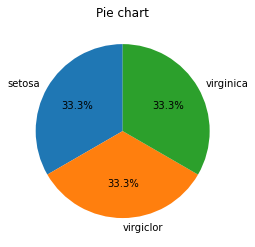

In [314]:
plt.title('Pie chart')
plt.pie(df['Species'].value_counts(),
        labels=['setosa','virgiclor','virginica'],autopct="%1.1f%%",startangle=90)
plt.show()

#### ・特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータ分布を可視化する

In [315]:
setosa = df[df['Species']==0]
virgicolor = df[df['Species']==1]
virginica = df[df['Species']==2]

### 'sepal_length'のラベルごとのデータ分布を可視化する

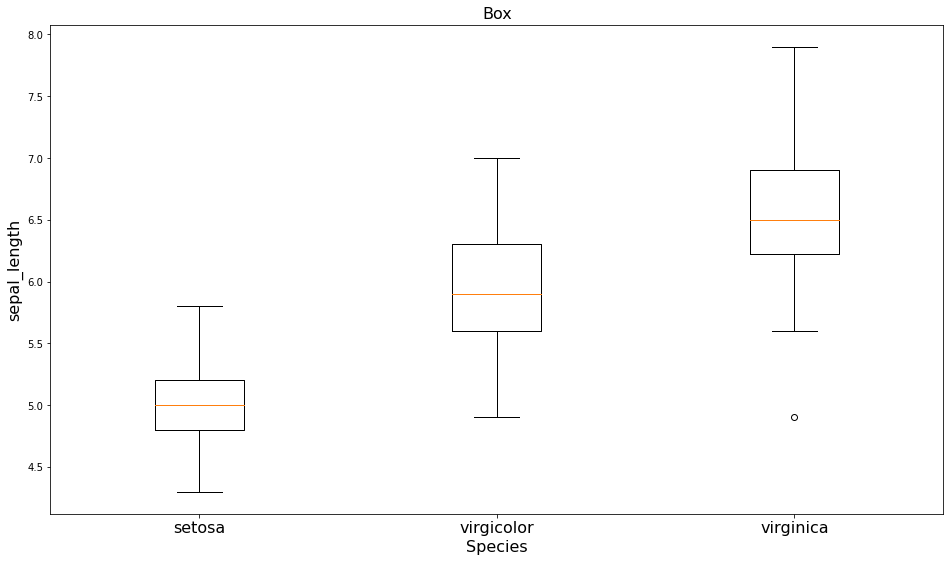

In [316]:
feature = 'sepal_length'
data = (setosa[feature],virgicolor[feature],virginica[feature])
s = 16

fig,axes = plt.subplots(figsize = (16,9))
plt.boxplot(data)
axes.set_xticklabels(['setosa','virgicolor','virginica'],size=s)

plt.title('Box',size=s)
plt.xlabel('Species',size=s)
plt.ylabel('sepal_length',size=s)
plt.show()

### 'sepal__width'のラベルごとのデータ分布を可視化する

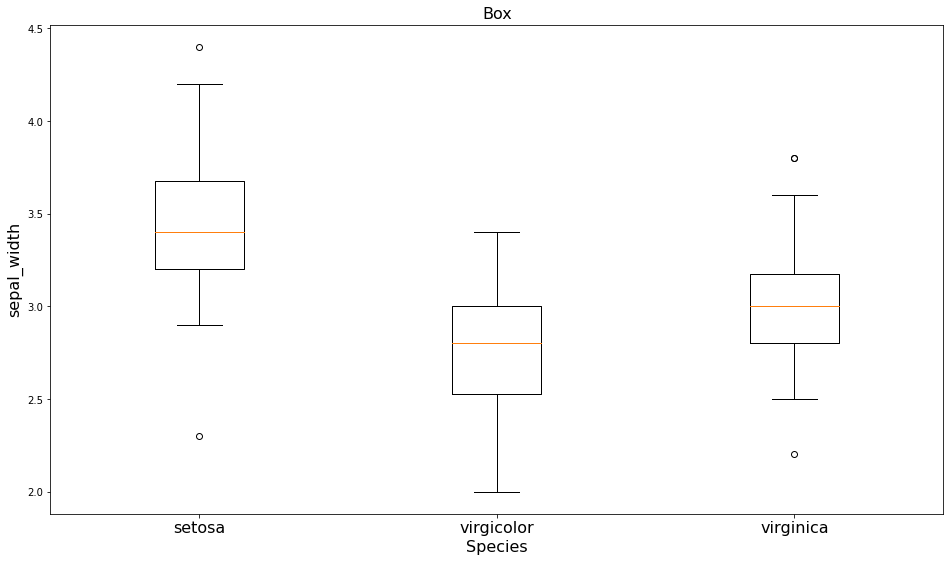

In [317]:
feature = 'sepal_width'
data = (setosa[feature],virgicolor[feature],virginica[feature])
s = 16

fig,axes = plt.subplots(figsize = (16,9))
plt.boxplot(data)
axes.set_xticklabels(['setosa','virgicolor','virginica'],size=s)

plt.title('Box',size=s)
plt.xlabel('Species',size=s)
plt.ylabel('sepal_width',size=s)
plt.show()

### 'petal_length'のラベルごとのデータ分布を可視化する

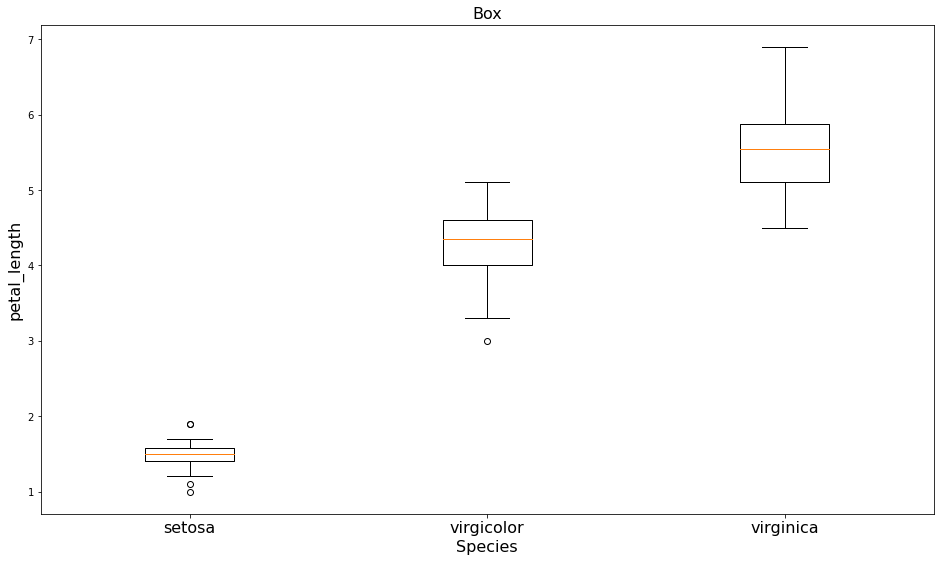

In [318]:
feature = 'petal_length'
data = (setosa[feature],virgicolor[feature],virginica[feature])
s = 16

fig,axes = plt.subplots(figsize = (16,9))
plt.boxplot(data)
axes.set_xticklabels(['setosa','virgicolor','virginica'],size=s)

plt.title('Box',size=s)
plt.xlabel('Species',size=s)
plt.ylabel('petal_length',size=s)
plt.show()

### 'petal_width'のラベルごとのデータ分布を可視化する

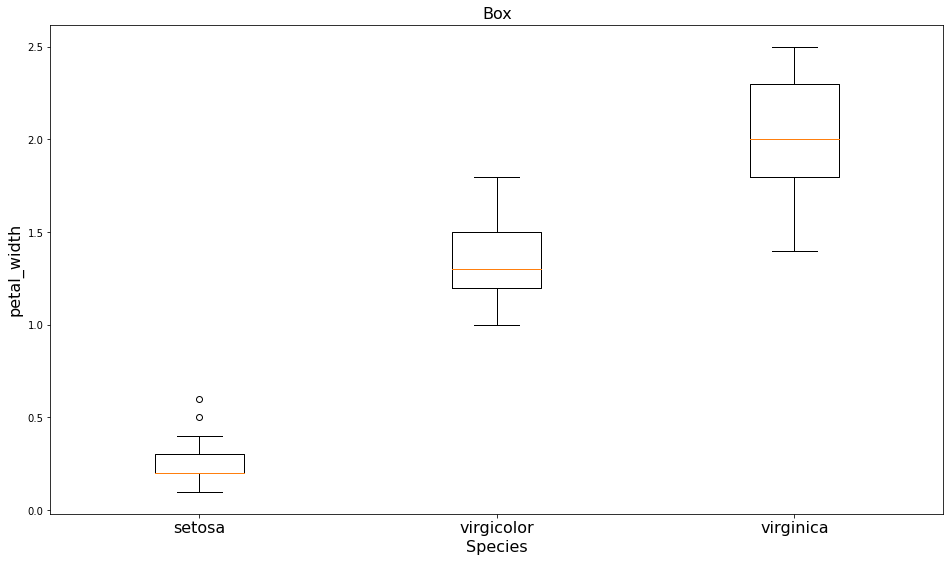

In [319]:
feature = 'petal_width'
data = (setosa[feature],virgicolor[feature],virginica[feature])
s = 16

fig,axes = plt.subplots(figsize = (16,9))
plt.boxplot(data)
axes.set_xticklabels(['setosa','virgicolor','virginica'],size=s)

plt.title('Box',size=s)
plt.xlabel('Species',size=s)
plt.ylabel('petal_width',size=s)
plt.show()

色々試してみる

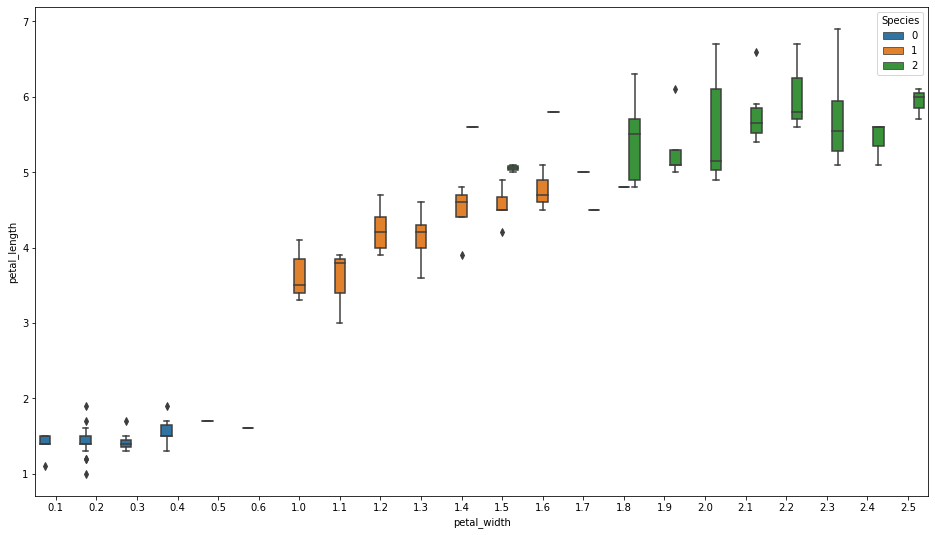

In [320]:
fig,axes = plt.subplots(figsize = (16,9))
sns.boxplot(x='petal_width',y='petal_length',hue='Species',data=df)
plt.show()

#### ・特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

### ・'sepal_length'のラベルごとのデータ分布を可視化する

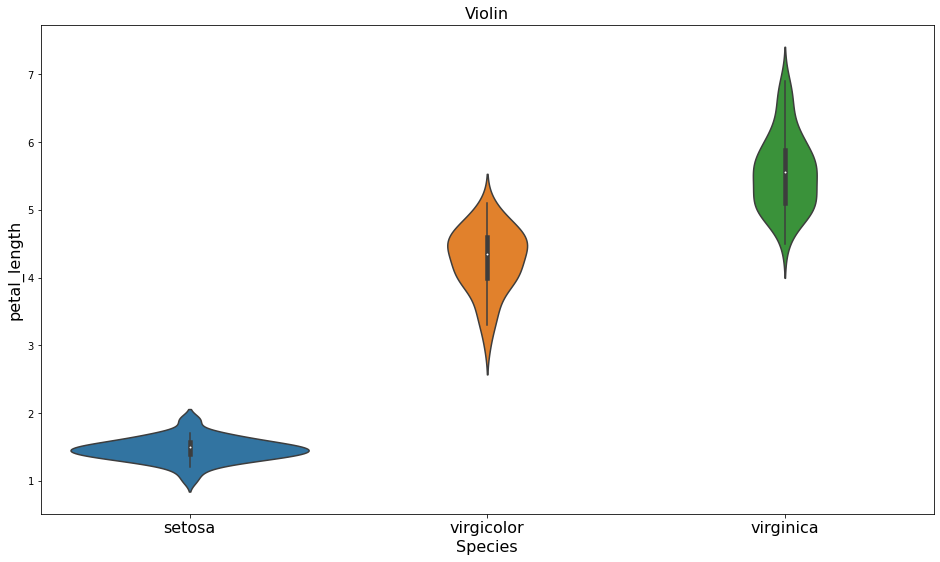

In [321]:
fig,axes = plt.subplots(figsize = (16,9))
s = 16

feature = 'petal_length'

sns.violinplot(x='Species',
               y=feature,
               data=df)

plt.title('Violin',size=s)
plt.xlabel('Species',size=s)
plt.ylabel(feature,size=s)
axes.set_xticklabels(['setosa','virgicolor','virginica'],size=s)
plt.show()

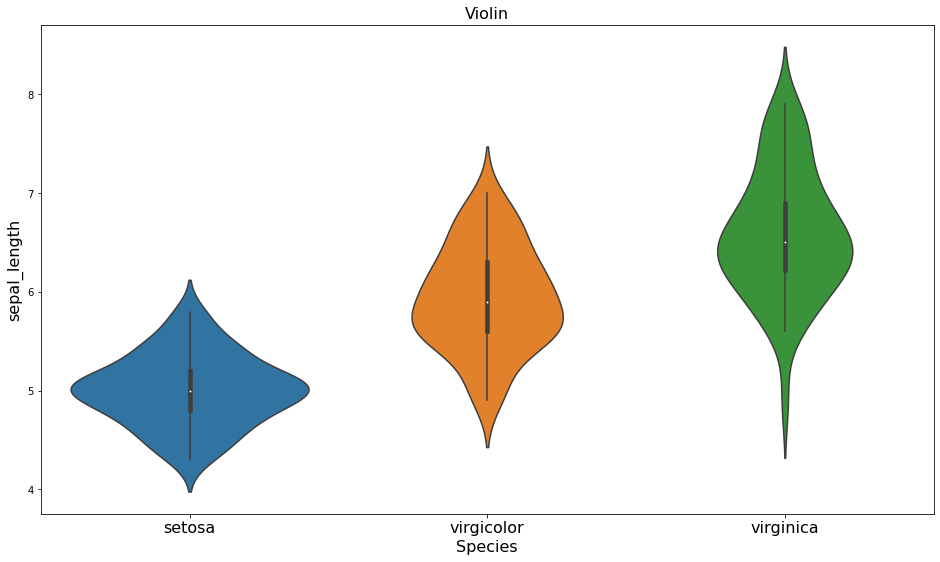

In [322]:
fig,axes = plt.subplots(figsize = (16,9))
s = 16

feature = 'sepal_length'

sns.violinplot(x='Species',
               y=feature,
               data=df)

plt.title('Violin',size=s)
plt.xlabel('Species',size=s)
plt.ylabel(feature,size=s)
axes.set_xticklabels(['setosa','virgicolor','virginica'],size=s)
plt.show()

### 箱ひげ図とバイオリン図の比較
・箱ひげ図　　　最大値、最小値、中央値など四分位範囲を箱で確認できる  
・バイオリン図　箱ひげ図と同様に、最大値、最小値、中央値など四分位範囲を示す箱の他に、データ分布を確認できる

#### 【問題7】特徴量間の関係の確認

特徴量間の関係を見ていきます。次の4つを行ってください。

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る(１つ)

In [323]:
import itertools
import numpy as np

coloumns = ['sepal_length','sepal_width','petal_length','petal_width']
combination = np.array(list(itertools.combinations(coloumns,2)))
print(combination)

[['sepal_length' 'sepal_width']
 ['sepal_length' 'petal_length']
 ['sepal_length' 'petal_width']
 ['sepal_width' 'petal_length']
 ['sepal_width' 'petal_width']
 ['petal_length' 'petal_width']]


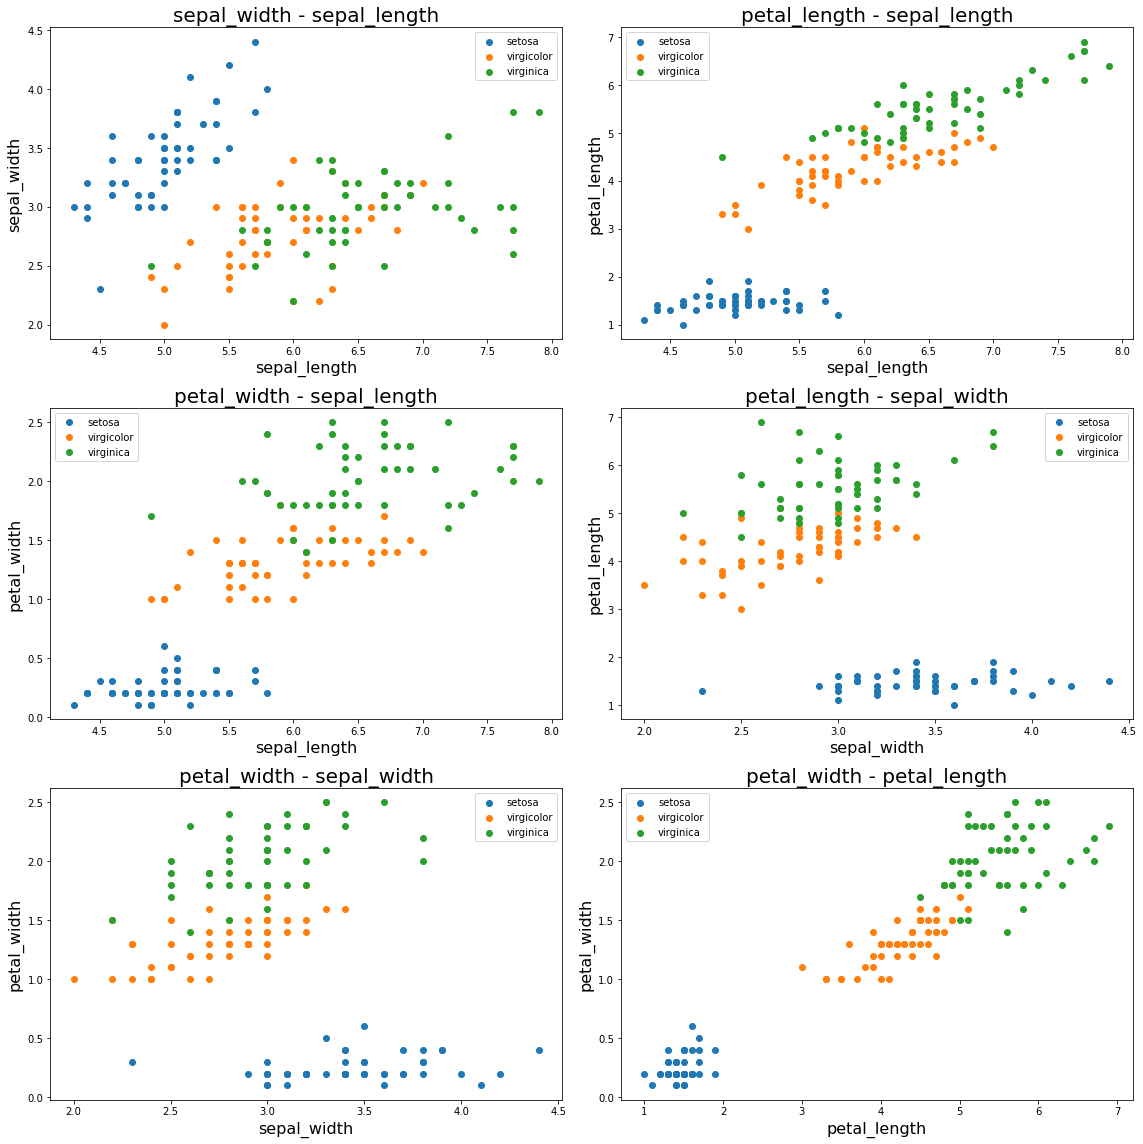

In [324]:
fig = plt.figure(figsize = (16,16))

for i,feature in enumerate(combination,1):
    
    feature_x = feature[0]
    feature_y = feature[1]

    data_x = (setosa[feature_x],virgicolor[feature_x],virginica[feature_x])
    data_y = (setosa[feature_y],virgicolor[feature_y],virginica[feature_y])
    
    ax = fig.add_subplot(3,2,i)
    plt.scatter(data_x[0],data_y[0],label='setosa')
    plt.scatter(data_x[1],data_y[1],label='virgicolor')
    plt.scatter(data_x[2],data_y[2],label='virginica')
    
    plt.title('{} - {}'.format(feature[1],feature[0]),size=20)
    plt.xlabel('{}'.format(feature[0]),size=16)
    plt.ylabel('{}'.format(feature[1]),size=16)
    plt.legend()
    

fig.tight_layout()
plt.show()

### 散布図行列の作成

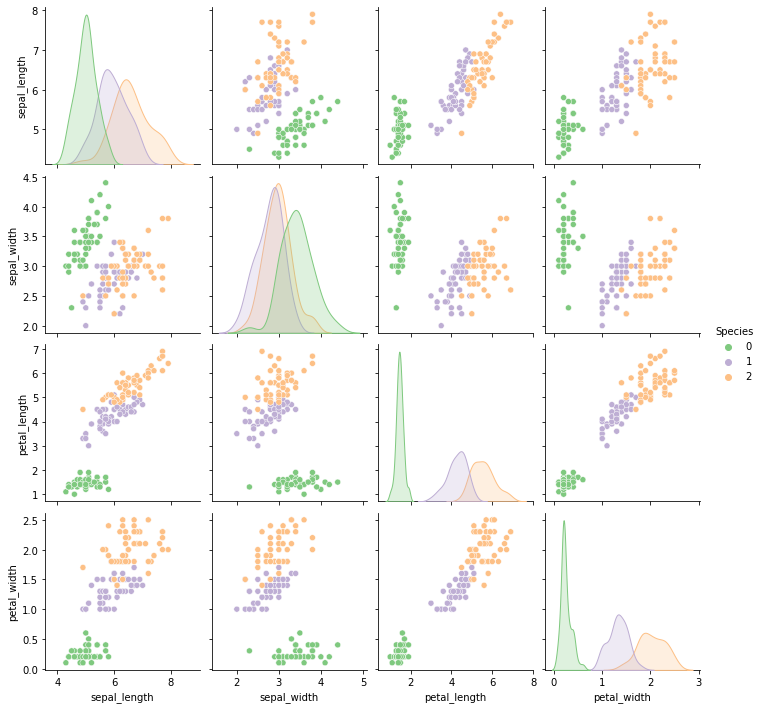

In [325]:
sns.pairplot(df,hue='Species',palette='Accent')
plt.show()

### 相関係数行列の作成

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


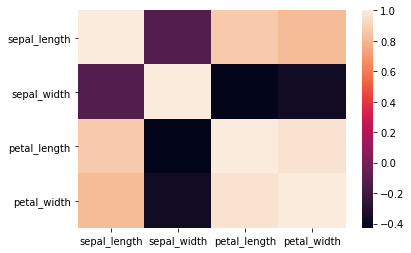

In [326]:
corr = x.corr()
print(corr)

sns.heatmap(corr)
plt.show()

#### 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。  
ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

＜考察＞  
・散布図行列から、setosaとその他の花弁の長さと幅で、明確に区別できそうなデータ分布をしている。
　setosaは、他と比べて花弁が小さいと考えられる。  
・versicolorとvirginicaは、花弁の長さと幅でおおよそ区別できそうなデータ分布をしている。  
・がく片の長さ、幅は、setosaとそれ以外で区別できそう。versicolorとvirginicaは区別が難しそう。